In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

import tensorflow as tf

%load_ext autoreload
%autoreload 2

In [2]:
from model import build_model
from dataset import iterate_dataset, iterate_sequences

In [3]:
def density_to_img(density):
    density = density[0] # Remove z direction
    return np.repeat(density, 3, axis=2)

def velocity_to_img(vel):
    vel = vel[0]
    return (vel - np.min(vel)) / (np.max(vel) - np.min(vel))

In [4]:
def animate(imgs):
    %matplotlib nbagg

    fig = plt.figure()
    imgs = [[plt.imshow(i, animated=True),] for i in imgs]
    ani = animation.ArtistAnimation(fig, imgs, interval=50, blit=True, repeat_delay=1000)
    return fig, ani

In [5]:
import os
print(os.listdir())


['real.mpeg', 'dataset.py', 'assets', '__pycache__', 'train.py', '.gitignore', 'data', '.ipynb_checkpoints', 'train_out', 'main.ipynb', 'pred.mpeg', 'model.py']


<IPython.core.display.Javascript object>


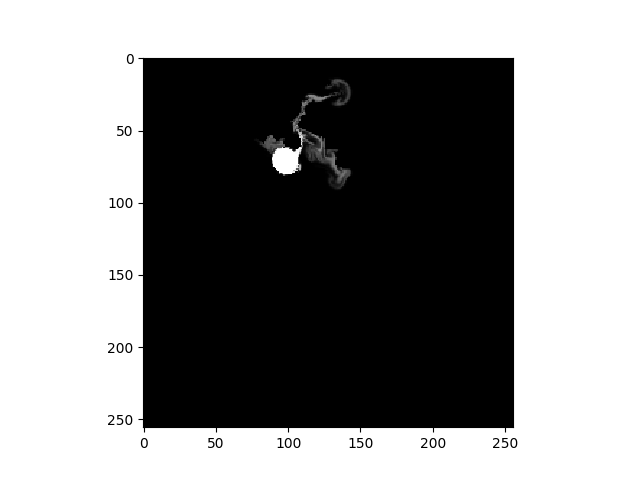

In [6]:
imgs = []
prev_sess = None
for item in iterate_dataset('data'):
    # Show only first session
    if prev_sess and prev_sess != item['sess_name']:
        break
    prev_sess = item['sess_name']
    
    imgs.append(density_to_img(item['density']))

fig, ani = animate(imgs)
plt.show()

In [7]:
batch_size = 1
res = 256
num_features = 1

tf.reset_default_graph()

x0 = tf.placeholder(tf.float32, shape=[batch_size, res, res, num_features])
x1 = tf.placeholder(tf.float32, shape=[batch_size, res, res, num_features])

y = build_model(x0, x1)

saver = tf.train.Saver()

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
imgs_real, imgs_pred = [], []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, 'train_out/2019-03-27 19:13:26.241750/checkpoints/latest.ckpt')
    
    prev_sess = None
    for x0_val, x05_val, x1_val in iterate_sequences(iterate_dataset('data')):
        # Only iterate first session
        if prev_sess and prev_sess != x0_val['sess_name']:
            break
        prev_sess = x0_val['sess_name']
        
        
        y_pred_val = sess.run(y, feed_dict={x0:x0_val['density'], x1:x1_val['density']})
        y_pred_val = np.copy(np.clip(y_pred_val, 0.0, 1.0))

        imgs_real.append(density_to_img(x05_val['density']))
        imgs_pred.append(density_to_img(y_pred_val))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from train_out/2019-03-27 19:13:26.241750/checkpoints/latest.ckpt


In [8]:
fig, ani = animate(imgs_real)
ani.save('assets/real.mpeg', writer="ffmpeg")

NameError: name 'imgs_real' is not defined

In [ ]:
fig, ani = animate(imgs_pred)
ani.save('assets/pred.mpeg', writer="ffmpeg")